In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

untuk data train

In [ ]:
dataset_train = pd.read_csv('/content/drive/My Drive/Dataset/DataQuiz/titanic_train.csv')
dataset_test = pd.read_csv('/content/drive/My Drive/Dataset/DataQuiz/titanic_eval.csv')


In [ ]:
dataset_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dataset_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [ ]:
#dataCleaning
#replace nilai ? dengan none
dataset_train.replace("?", np.nan, inplace=True)
dataset_test.replace("?", np.nan, inplace=True)


In [ ]:
#Cek apakah ada nilai null
dataset_train.isnull().sum().sort_values()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [ ]:
#Cek apakah ada nilai null
dataset_test.isnull().sum().sort_values()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [ ]:
#cek info dari setiap feature
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [ ]:
#tinggal num of doors dan price
dataset_train['class'].value_counts()

Third     341
First     159
Second    127
Name: class, dtype: int64

In [ ]:
dataset_train['deck'].value_counts()

unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64

In [ ]:
dataset_train['alone'].value_counts()

y    372
n    255
Name: alone, dtype: int64

In [ ]:
dataset_train['embark_town'].value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64

In [ ]:
cleanup_nums = {
    'class' : {
        'First' : 1,
        'Second' : 2,
        'Third' : 3
    },
    'alone' : {
        'y' : 1,
        'n' : 0
    },
    'deck' : {
        'A' : 1,
        'B' : 2,
        'C' : 3,
        'D' : 4,
        'E' : 5,
        'F' : 6,
        'G' : 7,
        'unknown' : 0
    },
    'sex' : {
        'male' : 1,
        'female' : 0
    }
}

dataset_train.replace(cleanup_nums, inplace=True)
dataset_test.replace(cleanup_nums, inplace=True)
dataset_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,3,0,Southampton,0
1,1,0,38.0,1,0,71.2833,1,3,Cherbourg,0
2,1,0,26.0,0,0,7.9250,3,0,Southampton,1
3,1,0,35.0,1,0,53.1000,1,3,Southampton,0
4,0,1,28.0,0,0,8.4583,3,0,Queenstown,1


In [ ]:
dataset_train.drop(['deck'], axis=1, inplace=True)
dataset_test.drop(['deck'], axis=1, inplace=True)
dataset_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,embark_town,alone
0,0,1,22.0,1,0,7.2500,3,Southampton,0
1,1,0,38.0,1,0,71.2833,1,Cherbourg,0
2,1,0,26.0,0,0,7.9250,3,Southampton,1
3,1,0,35.0,1,0,53.1000,1,Southampton,0
4,0,1,28.0,0,0,8.4583,3,Queenstown,1


In [ ]:
dataset_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,embark_town,alone
0,0,1,35.0,0,0,8.0500,3,Southampton,1
1,0,1,54.0,0,0,51.8625,1,Southampton,1
2,1,0,58.0,0,0,26.5500,1,Southampton,1
3,1,0,55.0,0,0,16.0000,2,Southampton,1
4,1,1,34.0,0,0,13.0000,2,Southampton,1


In [ ]:
label_train = dataset_train['survived']
feature_train = dataset_train.drop(['survived','embark_town'], axis=1)

In [ ]:
label_test = dataset_test['survived']
feature_test = dataset_test.drop(['survived', 'embark_town'], axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(label_train)
label_train = encoder.transform(label_train)

encoder.fit(label_test)
label_test = encoder.transform(label_test)

Deep Learning

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 7 features
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[ 'accuracy' ])

model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8, verbose=2)

Epoch 1/50
79/79 - 0s - loss: 0.5806 - accuracy: 0.7416 - val_loss: 0.4962 - val_accuracy: 0.7538
Epoch 2/50
79/79 - 0s - loss: 0.4429 - accuracy: 0.8086 - val_loss: 0.4669 - val_accuracy: 0.7803
Epoch 3/50
79/79 - 0s - loss: 0.4255 - accuracy: 0.8150 - val_loss: 0.4669 - val_accuracy: 0.7841
Epoch 4/50
79/79 - 0s - loss: 0.4219 - accuracy: 0.8214 - val_loss: 0.4548 - val_accuracy: 0.7803
Epoch 5/50
79/79 - 0s - loss: 0.4184 - accuracy: 0.8214 - val_loss: 0.4510 - val_accuracy: 0.7841
Epoch 6/50
79/79 - 0s - loss: 0.4174 - accuracy: 0.8166 - val_loss: 0.4484 - val_accuracy: 0.7841
Epoch 7/50
79/79 - 0s - loss: 0.4142 - accuracy: 0.8182 - val_loss: 0.4437 - val_accuracy: 0.7841
Epoch 8/50
79/79 - 0s - loss: 0.4151 - accuracy: 0.8150 - val_loss: 0.4479 - val_accuracy: 0.7803
Epoch 9/50
79/79 - 0s - loss: 0.4106 - accuracy: 0.8309 - val_loss: 0.4385 - val_accuracy: 0.7992
Epoch 10/50
79/79 - 0s - loss: 0.4087 - accuracy: 0.8262 - val_loss: 0.4392 - val_accuracy: 0.7879
Epoch 11/50
79/79 -

In [30]:
scores = model.evaluate(feature_test, label_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8068


Wider model

In [31]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)
wider_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[ 'accuracy' ])

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7974 - val_loss: 0.4832 - val_accuracy: 0.7538
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8054 - val_loss: 0.4613 - val_accuracy: 0.7803
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8118 - val_loss: 0.4506 - val_accuracy: 0.7955
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8134 - val_loss: 0.4507 - val_accuracy: 0.7879
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8182 - val_loss: 0.4440 - val_accuracy: 0.7879
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8214 - val_loss: 0.4377 - val_accuracy: 0.7992
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8278 - val_loss: 0.4368 - val_accuracy: 0.7992
Epoch 8/100
7

In [33]:
scores = wider_model.evaluate(feature_test, label_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8220


In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [35]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.547782,0.797448,0.483236,0.753788,0
1,0.434764,0.805423,0.461296,0.780303,1
2,0.429861,0.811802,0.450559,0.795455,2
3,0.423521,0.813397,0.450713,0.787879,3
4,0.417007,0.818182,0.443993,0.787879,4
...,...,...,...,...,...
95,0.375166,0.842105,0.441508,0.806818,95
96,0.372748,0.845295,0.445831,0.810606,96
97,0.383212,0.848485,0.437226,0.814394,97
98,0.380383,0.843700,0.442795,0.814394,98


In [36]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
46,0.389570,0.834131,0.423465,0.810606,46
58,0.380732,0.843700,0.423476,0.814394,58
50,0.387452,0.842105,0.423603,0.803030,50
41,0.390867,0.838915,0.424171,0.814394,41
39,0.393391,0.832536,0.424825,0.810606,39
...,...,...,...,...,...
2,0.429861,0.811802,0.450559,0.795455,2
3,0.423521,0.813397,0.450713,0.787879,3
80,0.375176,0.846890,0.451639,0.810606,80
1,0.434764,0.805423,0.461296,0.780303,1


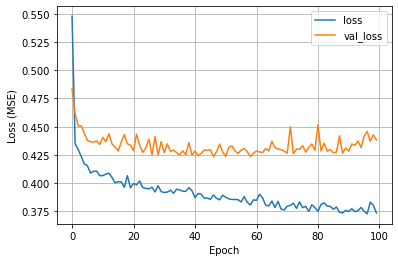

In [37]:
plot_loss(history) # epoch vs loss graph

Akurasi tertinggi didapatkan pada wider model yaitu 81.06% dengan nilai val_loss terkecil 0.423

---

